In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/My Drive/REVIEW CLASSIFIER/train.csv') as train:
  print(train)

<_io.TextIOWrapper name='/content/drive/My Drive/REVIEW CLASSIFIER/train.csv' mode='r' encoding='UTF-8'>


In [ ]:
import io
#train=pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf8')))
train=pd.read_csv('/content/drive/My Drive/REVIEW CLASSIFIER/train.csv')
test=pd.read_csv("/content/drive/My Drive/REVIEW CLASSIFIER/test.csv")

In [ ]:
train.head( )


,Id,Review,Sentiment
0,0,A series of escapades demonstrating the adage ...,1
1,2,A series,2
2,3,A,2
3,6,of,2
4,7,escapades demonstrating the adage that what is...,2


In [ ]:
test.head()

,Id,Review
0,1,A series of escapades demonstrating the adage ...
1,4,series
2,5,of escapades demonstrating the adage that what...
3,12,the adage
4,14,adage


In [ ]:
def show_info(data):
  print("Shape of dataset::",data.shape)
  print("columns are: ",data.columns)
  print("Value analysis: ",data.describe())

  print("DATA :::\n",data.head(4))
  
  print("\nNull Values analysis::\n",data.isna().sum())
  

show_info(train)
print("*******************TEST DATA************************")
show_info(test)


Shape of dataset:: (109170, 3)
columns are:  Index(['Id', 'Review', 'Sentiment'], dtype='object')
Value analysis:                    Id      Sentiment
count  109170.000000  109170.000000
mean    78090.855574       2.064523
std     45021.513255       0.892050
min         0.000000       0.000000
25%     39051.250000       2.000000
50%     78134.500000       2.000000
75%    116994.750000       3.000000
max    156059.000000       4.000000
DATA :::
    Id                                             Review  Sentiment
0   0  A series of escapades demonstrating the adage ...          1
1   2                                           A series          2
2   3                                                  A          2
3   6                                                 of          2

Null Values analysis::
 Id           0
Review       0
Sentiment    0
dtype: int64
*******************TEST DATA************************
Shape of dataset:: (46890, 2)
columns are:  Index(['Id', 'Review'], dtype='

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


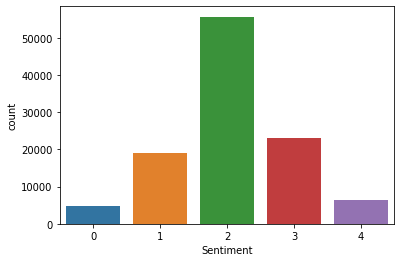

In [ ]:
import seaborn as sns

sns.countplot(train['Sentiment'])

In [ ]:
# data preprocessing
import nltk
from bs4 import BeautifulSoup #web scrapping
import re # expression matching operation
from tqdm import tqdm
from nltk.corpus import stopwords #natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [ ]:
def data_preprocessing(df):
    reviews = []
    for raw in tqdm(df['Review']):
        # remove html tag
        text = BeautifulSoup(raw, 'lxml').get_text()
        # remove non-letters
        letters_only = re.sub('[^a-zA-Z]', ' ', text)
        # split(lowercase)
        words = word_tokenize(letters_only.lower())
        # get stoplist words
        stops = set(stopwords.words('english'))
        # remove stopwords / get non-stopwords list
        non_stopwords = [word for word in words if not word in stops]
        # lemmatize word to its lemma
        lemma_words = [lemmatizer.lemmatize(word) for word in non_stopwords]    
        reviews.append(lemma_words)
    return reviews


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train_sentence=data_preprocessing(train)
test_sentence=data_preprocessing(test)


  0%|          | 1/109170 [00:01<46:34:32,  1.54s/it]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 66%|██████▋   | 72458/109170 [00:46<00:22, 1616.69it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'drive'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|██████████| 46890/46890 [00:29<00:00, 1576.85it/s]


In [ ]:
# split train_validation ,tokenize

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
target=train.Sentiment.values
y_target=to_categorical(target)#one hot encode
num_of_class=y_target.shape[1]
print(target[2],y_target[2],num_of_class)

2 [0. 0. 1. 0. 0.] 5


In [ ]:
Xtrain,Xval,ytrain,yval=train_test_split(train_sentence,y_target,test_size=0.2,stratify=y_target)
Xtrain2,Xval2,ytrain2,yval2=train_test_split(train_sentence,y_target,test_size=0.3,stratify=y_target)

In [ ]:
unique_words=set()

lenM=0
for sent in tqdm(Xtrain):
  unique_words.update(sent)
  if lenM<len(sent):
    lenM=len(sent)
len(list(unique_words)) ,lenM

100%|██████████| 87336/87336 [00:00<00:00, 640463.49it/s]


(13571, 28)

In [ ]:
# tokenizing and padding

tokenizer=Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(Xtrain))
word_index=tokenizer.word_index

Xtrain=tokenizer.texts_to_sequences(Xtrain)
Xval=tokenizer.texts_to_sequences(Xval)
Xtest=tokenizer.texts_to_sequences(test_sentence)

Xtrain=sequence.pad_sequences(Xtrain,maxlen=lenM)
Xval=sequence.pad_sequences(Xval,maxlen=lenM)
Xtest=sequence.pad_sequences(Xtest,maxlen=lenM)
Xtrain.shape,Xval.shape,Xtest.shape


((87336, 28), (21834, 28), (46890, 28))

In [ ]:
# defining the model along with using early stopping

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Embedding
from keras.optimizers import Adam


In [ ]:
!unzip "/content/drive/My Drive/PRETRAINED EMBEDDING/crawl-300d-2M.vec.zip" -d "/content/drive/My Drive/PRETRAINED EMBEDDING"

Archive:  /content/drive/My Drive/PRETRAINED EMBEDDING/crawl-300d-2M.vec.zip
replace /content/drive/My Drive/PRETRAINED EMBEDDING/crawl-300d-2M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
embd_path='/content/drive/My Drive/PRETRAINED EMBEDDING/crawl-300d-2M.vec'
embd_size=300
max_feature=30000
def get_coef(word,arr): return word,np.asarray(arr,dtype='float32')
emb_index=dict(get_coef(o.split(" ")[0],o.split(' ')[1:]) for o in open(embd_path))



In [ ]:
len(word_index)

embd_matrix=np.zeros((len(word_index)+1,embd_size))
for word, i in word_index.items():
  if i>=max_feature:continue
  embd_vector=emb_index.get(word)
  if embd_vector is not None:embd_matrix[i]=embd_vector

In [ ]:
early_stop=EarlyStopping(min_delta=0.001,mode='max',patience=2,monitor='val_accuracy')
callaback=[early_stop]

In [ ]:
#definig the model

model=Sequential()
model.add(Embedding(len(list(unique_words))+1,300,weights=[embd_matrix],trainable=False,input_length=lenM))
model.add(LSTM(128,dropout=0.5,recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(64,dropout=0.5,recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_class,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 28, 300)           4071600   
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 128)           219648    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 505       
Total params: 4,347,661
Trainable params: 276,061
Non-trainable params: 4,071,600
________________________________________

In [ ]:
#training with early stoping
hist=model.fit(Xtrain,ytrain,validation_data=(Xval,yval),epochs=10,batch_size=256,verbose=1,callbacks=callaback)

Epoch 1/10
342/342 [==============================] - 194s 566ms/step - loss: 0.9953 - accuracy: 0.5928 - val_loss: 0.9013 - val_accuracy: 0.6233
Epoch 2/10
342/342 [==============================] - 195s 570ms/step - loss: 0.9258 - accuracy: 0.6195 - val_loss: 0.8796 - val_accuracy: 0.6361
Epoch 3/10
342/342 [==============================] - 194s 568ms/step - loss: 0.9000 - accuracy: 0.6299 - val_loss: 0.8529 - val_accuracy: 0.6486
Epoch 4/10
342/342 [==============================] - 194s 567ms/step - loss: 0.8837 - accuracy: 0.6357 - val_loss: 0.8424 - val_accuracy: 0.6483
Epoch 5/10
342/342 [==============================] - 193s 565ms/step - loss: 0.8712 - accuracy: 0.6413 - val_loss: 0.8412 - val_accuracy: 0.6501
Epoch 6/10
342/342 [==============================] - 193s 563ms/step - loss: 0.8639 - accuracy: 0.6440 - val_loss: 0.8280 - val_accuracy: 0.6561
Epoch 7/10
342/342 [==============================] - 192s 563ms/step - loss: 0.8526 - accuracy: 0.6485 - val_loss: 0.8289 -

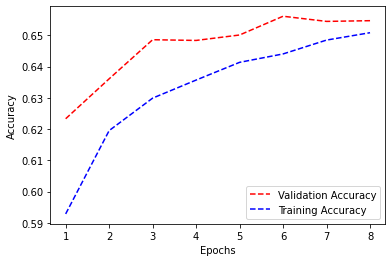

In [ ]:
ep=range(1,9)
plt.plot(ep,hist.history['val_accuracy'],'r--')
plt.plot(ep,hist.history['accuracy'],'b--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])

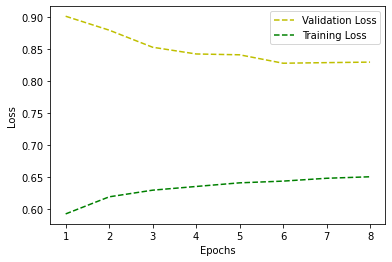

In [ ]:
plt.plot(ep,hist.history['val_loss'],'y--')
plt.plot(ep,hist.history['accuracy'],'g--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input,LSTM,Embedding,BatchNormalization,Conv1D,Dropout,GRU,Activation,Concatenate
from keras.layers import Flatten,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,MaxPool1D,SpatialDropout1D

from keras.models import Model,load_model
from keras import initializers ,regularizers,optimizers,callbacks
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNGRU
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
#definig model 2
def model_1(lr=0.0,lr_d=0.0,units=0,spatial_dr=0.0,kernel_size1=3,kernel_size2=2,dense_units=128,dr=0.1,conv_size=32):
  saving_path='/content/best_model_1.hdf5'
  file_path='/content/best_model_1.hdf5'
  #defining callbacks
  check_point=ModelCheckpoint(saving_path,monitor='val_loss',verbose=1,save_best_only=True,patience=3,mode="min")
  early_stop=EarlyStopping(monitor='val_loss',mode="min")

  #definig model structure
  inp = Input(shape = (lenM,))
  x=Embedding(len(list(unique_words))+1,300,weights=[embd_matrix],trainable=False,input_length=lenM)(inp)
  x1 = SpatialDropout1D(spatial_dr)(x)

  x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
  x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
  avg_pool1_gru = GlobalAveragePooling1D()(x1)
  max_pool1_gru = GlobalMaxPooling1D()(x1)
    
  x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
  avg_pool3_gru = GlobalAveragePooling1D()(x3)
  max_pool3_gru = GlobalMaxPooling1D()(x3)
    
  x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
  x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
  avg_pool1_lstm = GlobalAveragePooling1D()(x1)
  max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
  x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
  avg_pool3_lstm = GlobalAveragePooling1D()(x3)
  max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    
  x = Concatenate()([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
  x= BatchNormalization()(x)
  x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
  x = BatchNormalization()(x)
  x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
  x = Dense(5, activation = "softmax")(x)
  model = Model(inputs = inp, outputs = x)
  model.compile(loss = "categorical_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
  history = model.fit(Xtrain, ytrain, batch_size = 128, epochs = 20,validation_data=(Xval,yval), verbose = 1, callbacks = [check_point, early_stop])
 

  model = load_model(file_path)
  return model







In [ ]:
model1=load_model(filepath='/content/best_model_1.hdf5')

OSError: ignored

In [ ]:
model1 =model_1(lr = 1e-3, lr_d = 1e-10, units = 64, spatial_dr = 0.3, kernel_size1=3, kernel_size2=2, dense_units=32, dr=0.1, conv_size=32)

Epoch 1/20
683/683 [==============================] - ETA: 0s - loss: 1.0761 - accuracy: 0.5627
Epoch 00001: val_loss improved from inf to 0.90475, saving model to /content/best_model_1.hdf5
683/683 [==============================] - 139s 204ms/step - loss: 1.0761 - accuracy: 0.5627 - val_loss: 0.9047 - val_accuracy: 0.6266
Epoch 2/20
683/683 [==============================] - ETA: 0s - loss: 0.9510 - accuracy: 0.6097
Epoch 00002: val_loss improved from 0.90475 to 0.90066, saving model to /content/best_model_1.hdf5
683/683 [==============================] - 137s 201ms/step - loss: 0.9510 - accuracy: 0.6097 - val_loss: 0.9007 - val_accuracy: 0.6265
Epoch 3/20
683/683 [==============================] - ETA: 0s - loss: 0.9239 - accuracy: 0.6209
Epoch 00003: val_loss improved from 0.90066 to 0.87019, saving model to /content/best_model_1.hdf5
683/683 [==============================] - 137s 200ms/step - loss: 0.9239 - accuracy: 0.6209 - val_loss: 0.8702 - val_accuracy: 0.6366
Epoch 4/20
683

In [ ]:
##defining model 3
def model_2(lr=0.0,lr_d=0.0,units=0,sp_dr=0.0,kernel_1=3,kernel_2=2,dense_units=128,dr=0.1,conv_size=32):
  save_to='/content/drive/My Drive/REVIEW CLASSIFIER'
  #callbacks
  check=ModelCheckpoint(save_to,monitor='val_loss',verbose=1,mode='min',save_best_only=True)
  early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)
  #model structure
  inp = Input(shape = (lenM,))
  x=Embedding(len(list(unique_words))+1,300,weights=[embd_matrix],trainable=False,input_length=lenM)(inp)
  x1 = SpatialDropout1D(sp_dr)(x)
  xGRU=Bidirectional(GRU(units,return_sequences=True))(x1)
  xLSTM=Bidirectional(LSTM(units,return_sequences=True))(x1)
  
  xCONV1=Conv1D(conv_size,kernel_size=kernel_1,padding='valid',kernel_initializer='he_uniform')
  xCONV2=Conv1D(conv_size,kernel_size=kernel_2,padding='valid',kernel_initializer='he_uniform')

  GRU1=Conv1D(conv_size,kernel_size=kernel_1,padding='valid',kernel_initializer='he_uniform')(xGRU)
  GRU2=Conv1D(conv_size,kernel_size=kernel_2,padding='valid',kernel_initializer='he_uniform')(xGRU)

  LSTM1=Conv1D(conv_size,kernel_size=kernel_2,padding='valid',kernel_initializer='he_uniform')(xLSTM)
  LSTM2=Conv1D(conv_size,kernel_size=kernel_2,padding='valid',kernel_initializer='he_uniform')(xLSTM)

  avg_pool=GlobalAveragePooling1D()
  max_pool= GlobalMaxPooling1D()

  avg_gru_1=GlobalAveragePooling1D()(GRU1)
  max_gru_1=GlobalMaxPooling1D()(GRU1)
  avg_gru_2=GlobalAveragePooling1D()(xCONV2)(GRU2)
  max_gru_2=GlobalMaxPooling1D()(xCONV2)(GRU2)

  avg_lstm_1=GlobalAveragePooling1D()(LSTM1)
  max_lstm_1=GlobalMaxPooling1D()(LSTM1)
  avg_lstm_2=GlobalAveragePooling1D()(LSTM2)
  max_lstm_2=GlobalMaxPooling1D()(LSTM2)

  #concatinating lstms and grus

  x = Concatenate()([avg_gru_1,avg_gru_2,avg_lstm_1,avg_lstm_2,max_gru_1,max_gru_2,max_lstm_1,max_lstm_2])
  x= BatchNormalization()(x)
  x= Dropout(dr)(Dense(dense_units,activation='relu')(x))
  x= BatchNormalization()(x)
  x = Dropout(dr)(Dense(int(dense_units/2),activation='relu')(x))
  x=Dense(5,activation='sigmoid')(x)
  model=Model(inputs=inp,outputs=x)
  model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr,decay=lr_d),metrics=['accuracy'])
  history=model.fit(Xtrain, ytrain, batch_size = 128, epochs = 20,validation_data=(Xval,yval), verbose = 1, callbacks = [check, early_stop])
  model=load_model(save_to)
  return model

In [ ]:
def build_model2(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
    inp = Input(shape = (lenM,))
    x=Embedding(len(list(unique_words))+1,300,weights=[embd_matrix],trainable=False,input_length=lenM)(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)

    x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    
    x_conv1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x_conv1)
    max_pool1_gru = GlobalMaxPooling1D()(x_conv1)
    
    x_conv2 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool2_gru = GlobalAveragePooling1D()(x_conv2)
    max_pool2_gru = GlobalMaxPooling1D()(x_conv2)
    x_conv3 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x_conv3)
    max_pool1_lstm = GlobalMaxPooling1D()(x_conv3)
    
    x_conv4 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool2_lstm = GlobalAveragePooling1D()(x_conv4)
    max_pool2_lstm = GlobalMaxPooling1D()(x_conv4)
    
    
    x = Concatenate()([avg_pool1_gru, max_pool1_gru, avg_pool2_gru, max_pool2_gru,
                    avg_pool1_lstm, max_pool1_lstm, avg_pool2_lstm, max_pool2_lstm])
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = Dense(5, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
    history = model.fit(Xtrain, ytrain, batch_size = 128, epochs = 20, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path)
    return model

In [ ]:
model4 = build_model2(lr = 1e-3, lr_d = 0, units = 64, spatial_dr = 0.5, kernel_size1=3, kernel_size2=3, dense_units=64, dr=0.3, conv_size=32)

Epoch 1/20
615/615 [==============================] - ETA: 0s - loss: 0.3980 - accuracy: 0.5359
Epoch 00001: val_loss improved from inf to 0.31812, saving model to best_model.hdf5
615/615 [==============================] - 153s 248ms/step - loss: 0.3980 - accuracy: 0.5359 - val_loss: 0.3181 - val_accuracy: 0.6152
Epoch 2/20
615/615 [==============================] - ETA: 0s - loss: 0.3425 - accuracy: 0.5894
Epoch 00002: val_loss improved from 0.31812 to 0.31275, saving model to best_model.hdf5
615/615 [==============================] - 153s 248ms/step - loss: 0.3425 - accuracy: 0.5894 - val_loss: 0.3128 - val_accuracy: 0.6239
Epoch 3/20
615/615 [==============================] - ETA: 0s - loss: 0.3327 - accuracy: 0.6015
Epoch 00003: val_loss improved from 0.31275 to 0.30529, saving model to best_model.hdf5
615/615 [==============================] - 152s 248ms/step - loss: 0.3327 - accuracy: 0.6015 - val_loss: 0.3053 - val_accuracy: 0.6344
Epoch 4/20
615/615 [===========================

In [ ]:
model4 = model_2(lr = 1e-3, lr_d = 0, units = 64, sp_dr = 0.5, kernel_1=3, kernel_2=3, dense_units=64, dr=0.3, conv_size=32)

AttributeError: ignored

In [ ]:
 
PRED_1=model.predict(Xtest,batch_size=1024,verbose=1)
PRED_2=model1.predict(Xtest,batch_size=1024,verbose=1)
PRED_3=model4.predict(Xtest,batch_size=1024,verbose=1)
#
#

46/46 [==============================] - 29s 620ms/step


In [ ]:
pred=np.add(PRED_1,PRED_3)

prediction=np.round(np.argmax(pred,axis=1)).astype(int)
sub=pd.read_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv')
sub['Sentiment']=prediction
sub.to_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv', index=False)
sub.head(10)

,Id,Sentiment
0,1,2
1,4,2
2,5,2
3,12,2
4,14,2
5,15,3
6,19,3
7,20,2
8,32,1
9,33,1


In [ ]:
pred=np.add(PRED_1,PRED_2)
pred=np.add(pred,PRED_3)
prediction=np.round(np.argmax(pred,axis=1)).astype(int)
sub=pd.read_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv')
sub['Sentiment']=prediction
sub.to_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv', index=False)
sub.head(10)

,Id,Sentiment
0,1,2
1,4,2
2,5,2
3,12,2
4,14,2
5,15,3
6,19,3
7,20,2
8,32,2
9,33,2


In [ ]:

prediction=np.round(np.argmax(PRED_1,axis=1)).astype(int)
sub=pd.read_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv')
sub['Sentiment']=prediction
sub.to_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv', index=False)
sub.head(10)

,Id,Sentiment
0,1,2
1,4,2
2,5,2
3,12,2
4,14,2
5,15,3
6,19,3
7,20,2
8,32,1
9,33,1


In [ ]:
PRED_1.shape
pred=np.add(PRED_1,PRED_2)
pred.shape
prediction=np.round(np.argmax(pred,axis=1)).astype(int)
sub=pd.read_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv')
sub['Sentiment']=prediction
sub.to_csv('/content/drive/My Drive/REVIEW CLASSIFIER/sample_submission.csv', index=False)
sub.head(10)

,Id,Sentiment
0,1,2
1,4,2
2,5,2
3,12,2
4,14,2
5,15,3
6,19,3
7,20,2
8,32,1
9,33,1


model1=build_model()
model1.summary()

In [ ]:
hist2=model2.fit(Xtrain,ytrain,32,validation_data=(Xval,yval))

In [ ]:
hist_2=model2.fit(Xtrain,ytrain,batch_size=32,epochs=10)

In [ ]:
hist_2=model2.fit(Xtrain,ytrain,batch_size=256,verbose=1,epochs=5,validation_data=(Xval,yval))

In [ ]:
ep=range(1,6)
plt.plot(ep,hist_2.history['val_loss'],'b--')
plt.plot(ep,hist_2.history['loss'],'r--')